<a href="https://colab.research.google.com/github/LifnaJos/ADC601-Data-Analytics-Visualization/blob/DAV_Colab_Notebooks/Introduction_R_ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to R and ggplot2**
Courtesy :
* Prof. Yibi Huang, Department of Statistics, University of Chicago
* Analysis prepared based on [STAT 224 Lecture 1
R and Intro to ggplot2](https://www.stat.uchicago.edu/~yibi/teaching/stat224/L01.pdf)
* [Useful ggplot Tutorial : Introduction to R Graphics with ggplot2 (from Harvard)](https://iqss.github.io/dss-workshops/Rgraphics.html)

## **Data: Smoking & FEV (Lung Capacity)**

Sample of 654 youths, aged 3 to 19, in the area of East Boston during middle to late 1970’s. The variables are
* age: Subject’s age in years
* fev: Lung capacity of subject, measured by forced expiratory volume (abbreviated as FEV), the amount of air an individual can exhale in the first second of forceful breath in liters
* ht: Subject’s height in inches
* sex: Gender of the subject coded as: 0 = Female, 1 = Male
* smoke:Smoking status coded as: 0 = Nonsmoker, 1 = Smoker

You can download the data at http://www.stat.uchicago.edu/~yibi/s224/data/fevdata.txt

Note : Save it on your computer, and then change the working directory
to the folder the file fevdata.txt is saved.

In [1]:
fevdata = read.table("fevdata.txt", header = TRUE)

In [2]:
# The first few rows of the data:
head(fevdata)

,age,fev,ht,sex,smoke
,<int>,<dbl>,<dbl>,<int>,<int>
1,9,1.708,57.0,0,0
2,8,1.724,67.5,0,0
3,7,1.720,54.5,0,0
4,9,1.558,53.0,1,0
5,9,1.895,57.0,1,0
6,8,2.336,61.0,0,0


## **Finding Data Summaries in R**

**Finding the Sample Mean in R**

In [4]:
# mean(fev)
# R cannot find the variable fev unless you indicate it’s inside the data frame fevdata as follows.
mean(fevdata$fev)

[1] 2.63678

In [5]:
median(fevdata$fev)

[1] 2.5475

In [6]:
sd(fevdata$fev)

[1] 0.8670591

In [7]:
var(fevdata$fev)

[1] 0.7517915

In [8]:
max(fevdata$fev)

[1] 5.793

In [9]:
min(fevdata$fev)

[1] 0.791

In [10]:
sum(fevdata$fev)

[1] 1724.454

In [11]:
IQR(fevdata$fev)

[1] 1.1375

**Data Summaries “By Group”**
- Other than summarizing data over the entire data set, one might want to summarize data (mean, median, SD, IQR, etc) by group, e.g., by gender, by smoking status, or by some other grouping variables

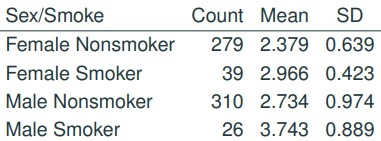

* **aggregate()** function in R allows users to summarize data by
group with simple syntax.
* other summary statistics: median(), sd(), var(), max(), min(), sum(), etc,
* **syntax:** aggregate(variable ~ grouping_var, data=dataframename, stat_fun)

In [12]:
# Mean FEV by Gender: (0 for females, 1 for males)
aggregate(fev ~ sex, data = fevdata, mean)

sex,fev
<int>,<dbl>
0,2.451170
1,2.812446


In [14]:
# Mean FEV by Smoking Status: (0 for nonsmokers, 1 for smokers)
aggregate(fev ~ smoke, data = fevdata, mean)

smoke,fev
<int>,<dbl>
0,2.566143
1,3.276862


**Changing the Labels of Categorical Variables**

In [15]:
# Better giving meaningful labels for the categories of sex and smoke rather than 0 and 1.
fevdata$sex = factor(fevdata$sex, labels=c("Female","Male"))
fevdata$smoke = factor(fevdata$smoke, labels=c("Nonsmoker","Smoker"))

Do males or females have a greater mean FEV (lung capacity)?

In [16]:
aggregate(fev ~ sex, data = fevdata, mean)

sex,fev
<fct>,<dbl>
Female,2.451170
Male,2.812446


Do smokers or nonsmokers have a greater mean FEV?


In [17]:
aggregate(fev ~ smoke, data = fevdata, mean)

smoke,fev
<fct>,<dbl>
Nonsmoker,2.566143
Smoker,3.276862


**Surprising!** How could smokers have a greater mean lung capacities than nonsmokers?

**Summarizing Data By Two Grouping Variables**

In [18]:
# Mean FEV by both gender & smoking status:
aggregate(fev ~ smoke + sex, data = fevdata, mean)

smoke,sex,fev
<fct>,<fct>,<dbl>
Nonsmoker,Female,2.379211
Smoker,Female,2.965949
Nonsmoker,Male,2.734381
Smoker,Male,3.743231


* For females, did smokers or non-smokers have greater mean lung capacities?
* For males, did smokers or non-smokers have greater mean lung capacities?


In [19]:
# Other Summary Statistics “by Group”
aggregate(fev ~ smoke, data = fevdata, sd)

smoke,fev
<fct>,<dbl>
Nonsmoker,0.8505215
Smoker,0.7499863


In [20]:
aggregate(fev ~ smoke + sex, data = fevdata, median)

smoke,sex,fev
<fct>,<fct>,<dbl>
Nonsmoker,Female,2.4170
Smoker,Female,3.0740
Nonsmoker,Male,2.5475
Smoker,Male,3.8780


- summary() function can report the five-number summary.

In [22]:
summary(fevdata)

      age              fev              ht            sex            smoke    
 Min.   : 3.000   Min.   :0.791   Min.   :46.00   Female:318   Nonsmoker:589  
 1st Qu.: 8.000   1st Qu.:1.981   1st Qu.:57.00   Male  :336   Smoker   : 65  
 Median :10.000   Median :2.547   Median :61.50                               
 Mean   : 9.931   Mean   :2.637   Mean   :61.14                               
 3rd Qu.:12.000   3rd Qu.:3.119   3rd Qu.:65.50                               
 Max.   :19.000   Max.   :5.793   Max.   :74.00                               

**aggregate() + summary()**
- - summary() function can report the five-number summary + mean.

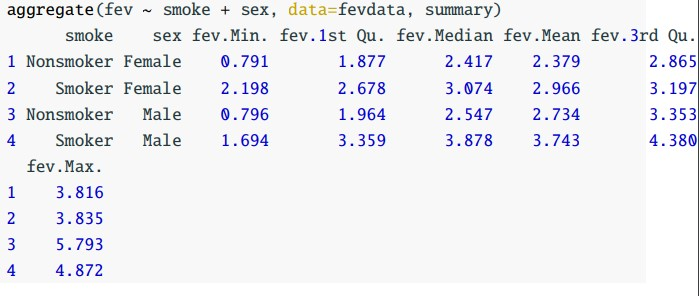

In [21]:
aggregate(fev ~ smoke + sex, data=fevdata, summary)

smoke,sex,fev
<fct>,<fct>,"<dbl[,6]>"
Nonsmoker,Female,"0.791, 1.87750, 2.4170, 2.379211, 2.86500, 3.816"
Smoker,Female,"2.198, 2.67800, 3.0740, 2.965949, 3.19700, 3.835"
Nonsmoker,Male,"0.796, 1.96425, 2.5475, 2.734381, 3.35300, 5.793"
Smoker,Male,"1.694, 3.35875, 3.8780, 3.743231, 4.38025, 4.872"


Do smokers still appear to have greater lung capacities than nonsmokers?


In [25]:
aggregate(fev ~ sex, data=fevdata, summary)

sex,fev
<fct>,"<dbl[,6]>"
Female,"0.791, 1.9485, 2.486, 2.451170, 2.99175, 3.835"
Male,"0.796, 2.0085, 2.606, 2.812446, 3.53475, 5.793"


In [26]:
aggregate(fev ~ smoke, data=fevdata, summary)

smoke,fev
<fct>,"<dbl[,6]>"
Nonsmoker,"0.791, 1.920, 2.465, 2.566143, 3.048, 5.793"
Smoker,"1.694, 2.795, 3.169, 3.276862, 3.751, 4.872"


## **Graphical Summary**

**1. Boxplots**
- compactly displays the distribution of a continuous variable.
- commonly used to show the distribution of data in a standard way by presenting five summary values.
- - minimum, Q1 (First Quartile), median, Q3 (Third Quartile), and maximum values.  
- Summarizing these values can provide us with information about **outliers and their values.**  
- Courtesy :
- - [Boxplot](https://leansigmacorporation.com/box-plot-with-minitab/)
- - [Boxplot Tutorial - 1](https://ggplot2.tidyverse.org/reference/geom_boxplot.html)
- - [Boxplot Tutorial - 2](https://www.geeksforgeeks.org/box-plot-in-r-using-ggplot2/)

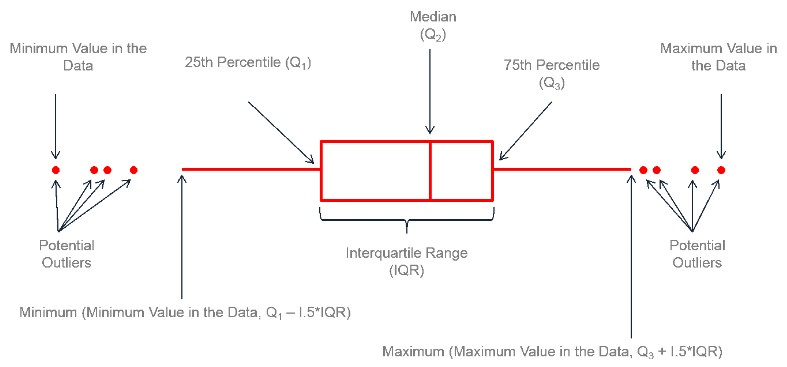

In [35]:
summary(fevdata$fev)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.791   1.981   2.547   2.637   3.119   5.793 

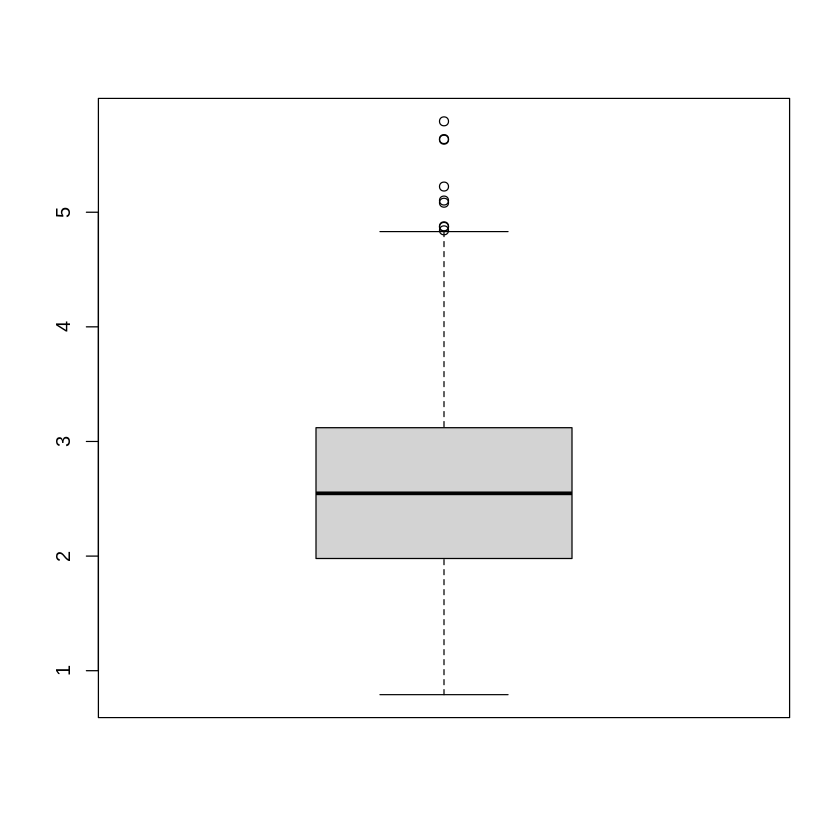

In [36]:
boxplot(fevdata$fev)

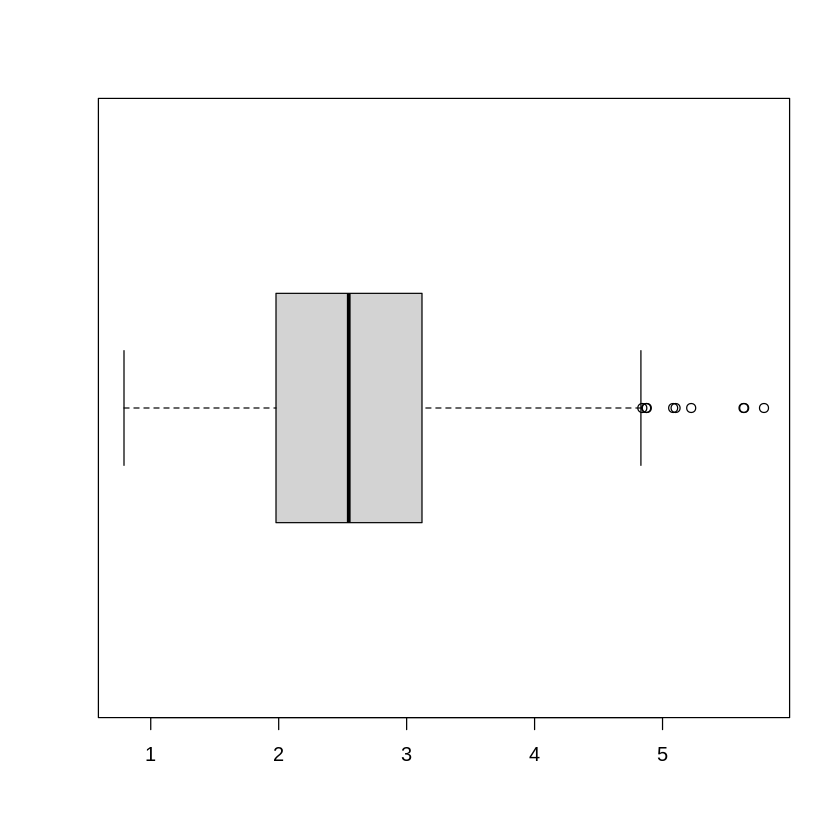

In [37]:
boxplot(fevdata$fev, horizontal = T)

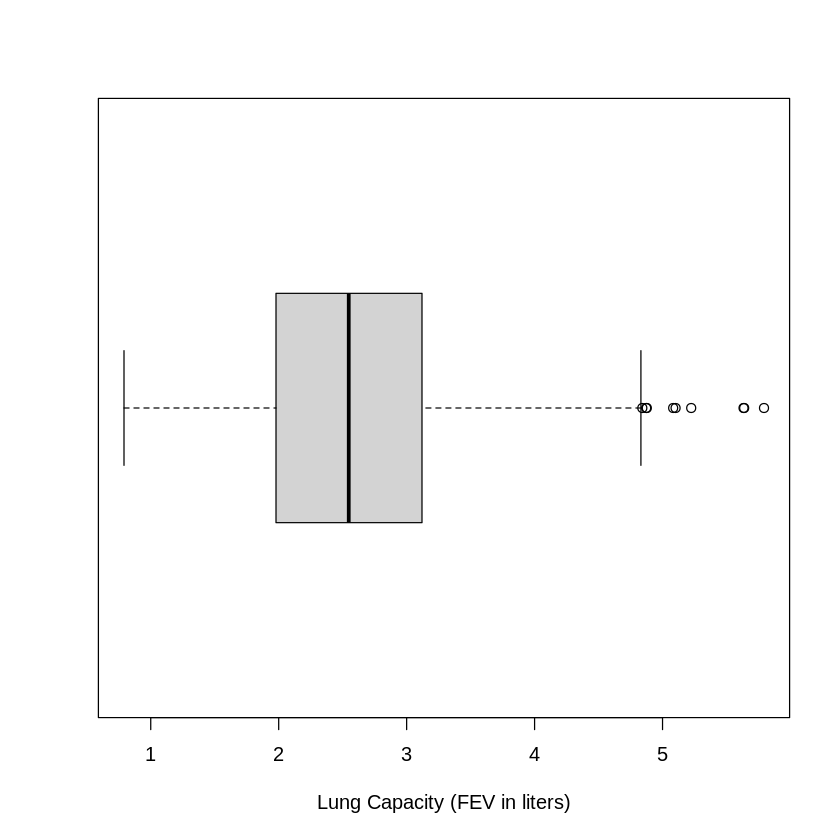

In [38]:
boxplot(fevdata$fev, horizontal = T, xlab="Lung Capacity (FEV in liters)")

**2. Histograms**

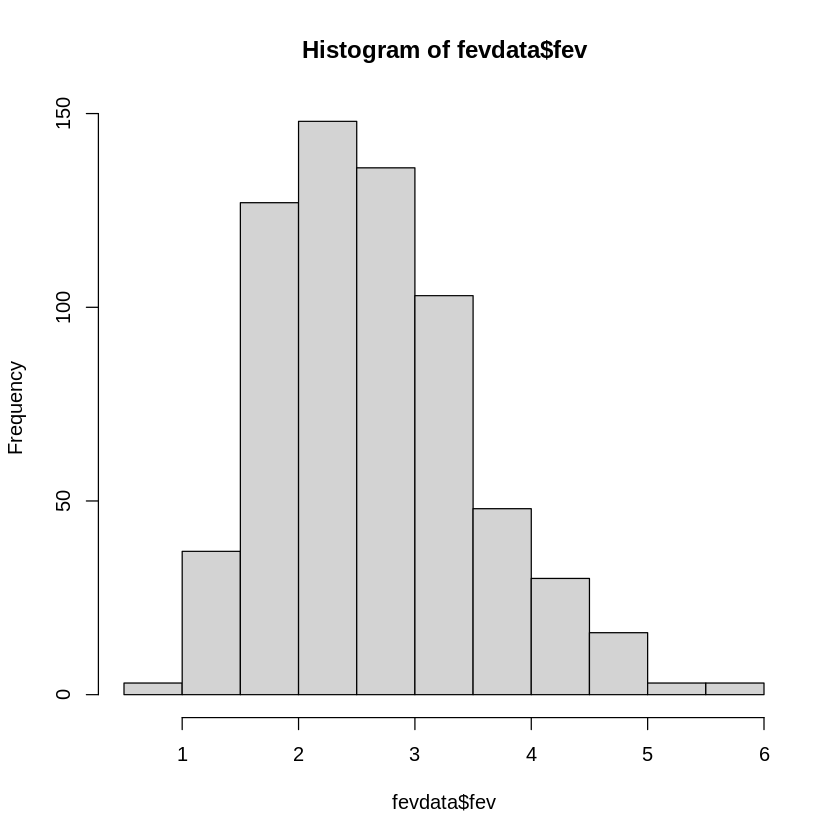

In [39]:
hist(fevdata$fev)

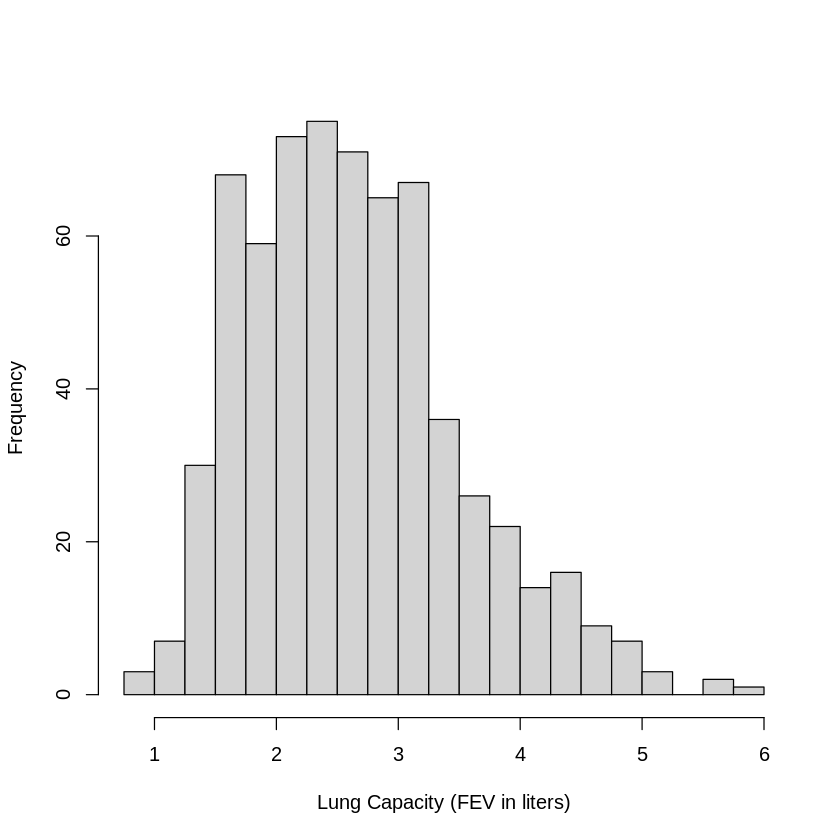

In [40]:
hist(fevdata$fev, breaks=seq(0.75,6, 0.25), xlab="Lung Capacity (FEV in liters)", main="")


## **ggplot2 Library**

* “gg” in ggplot means = Grammer of Graphics
* a powerful and versatile toolkit for data visualization

Note : Before installing the ggplot2 library, make sure you haven't installed it by loading the library.

In [33]:
library(ggplot2)

- If you get no message, that means the ggplot2 has been installed on your machine. You can move on and skip installation.
- If you get the error message below
- - *Error in library(ggplot2) : there is no package called "ggplot2"*
- - that means the ggplot2 library is not installed. You can install it using the command below.

In [ ]:
# install.packages("ggplot2")

* aes() is the short hand for “aesthetic”.
* Variables involved in a ggplot must be enclosed within aes().

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


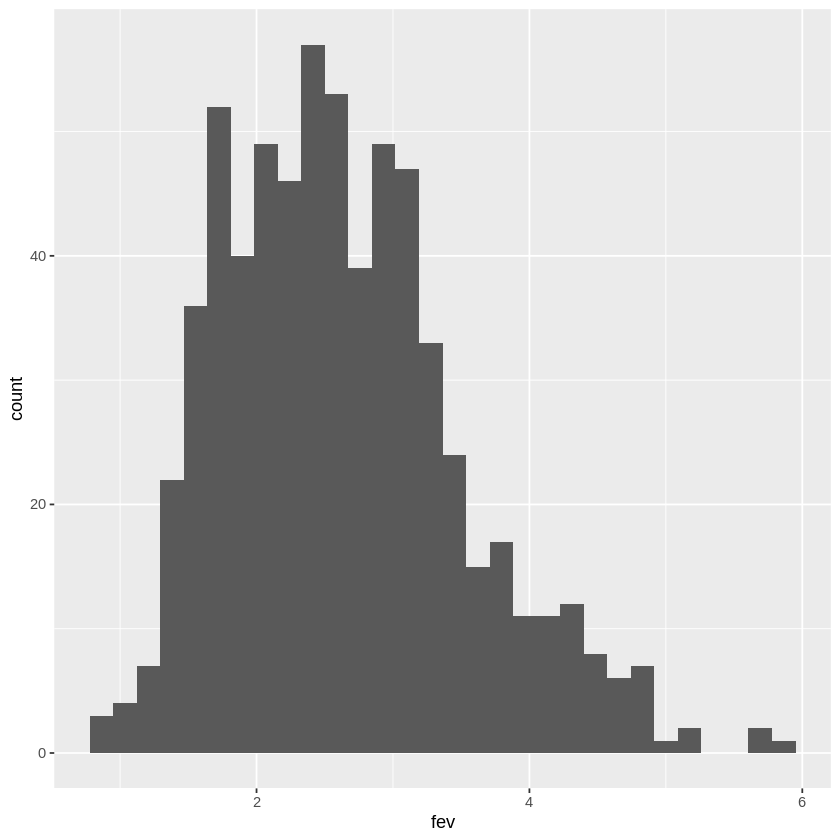

In [41]:
ggplot(fevdata, aes(x = fev)) + geom_histogram()

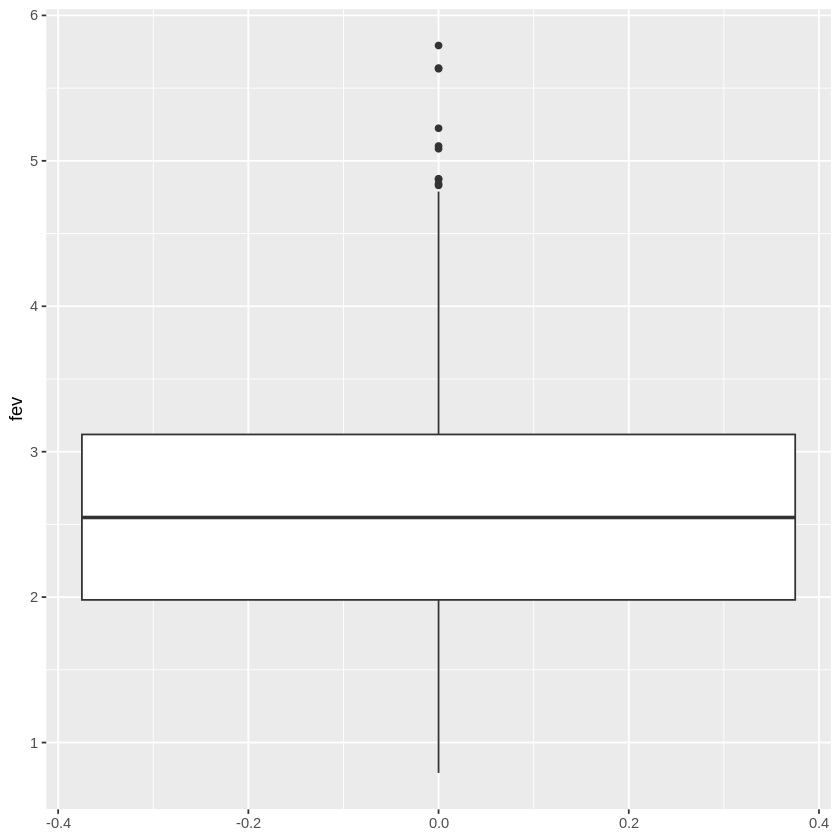

In [42]:
ggplot(fevdata, aes(y = fev)) + geom_boxplot()

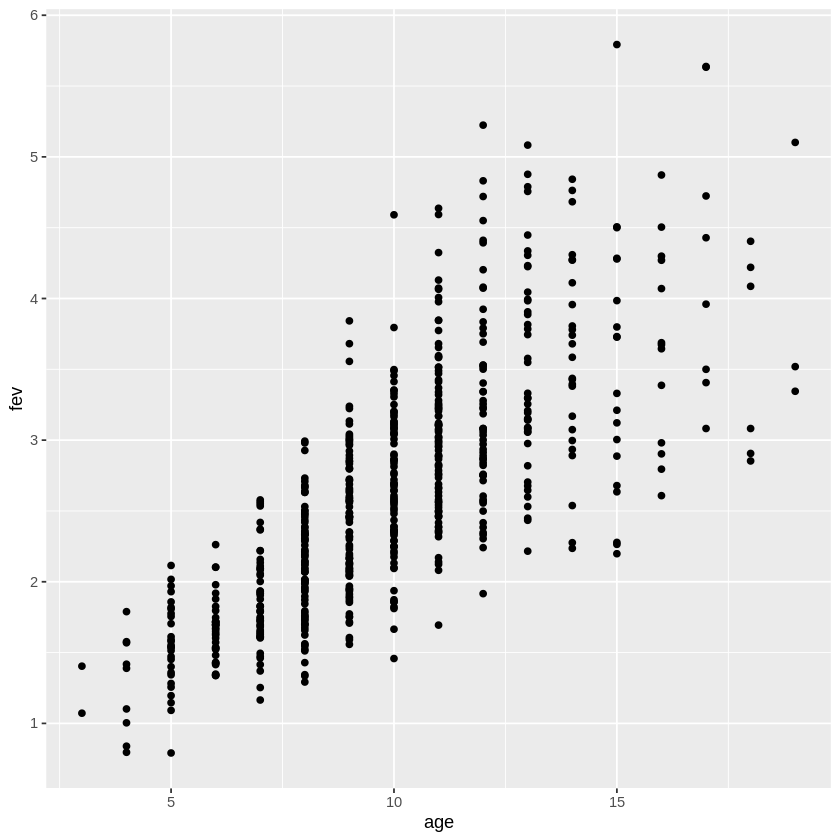

In [43]:
ggplot(fevdata, aes(x = age, y = fev)) + geom_point()

Note : Please ALWAYS Adjust the Binwidth of Histograms

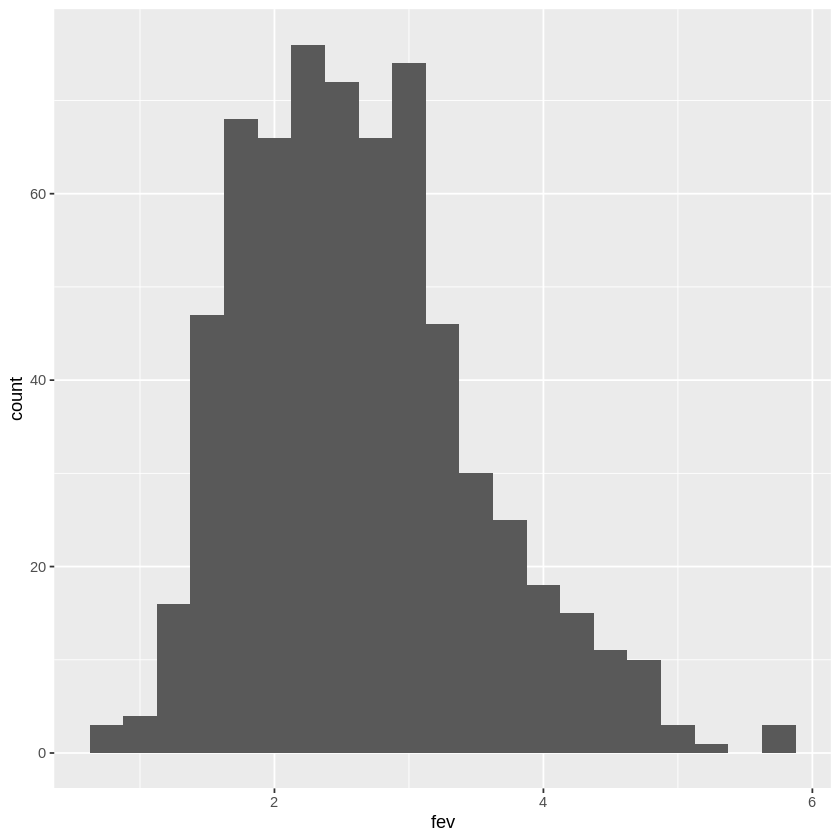

In [44]:
ggplot(fevdata, aes(x = fev)) + geom_histogram(binwidth = 0.25)

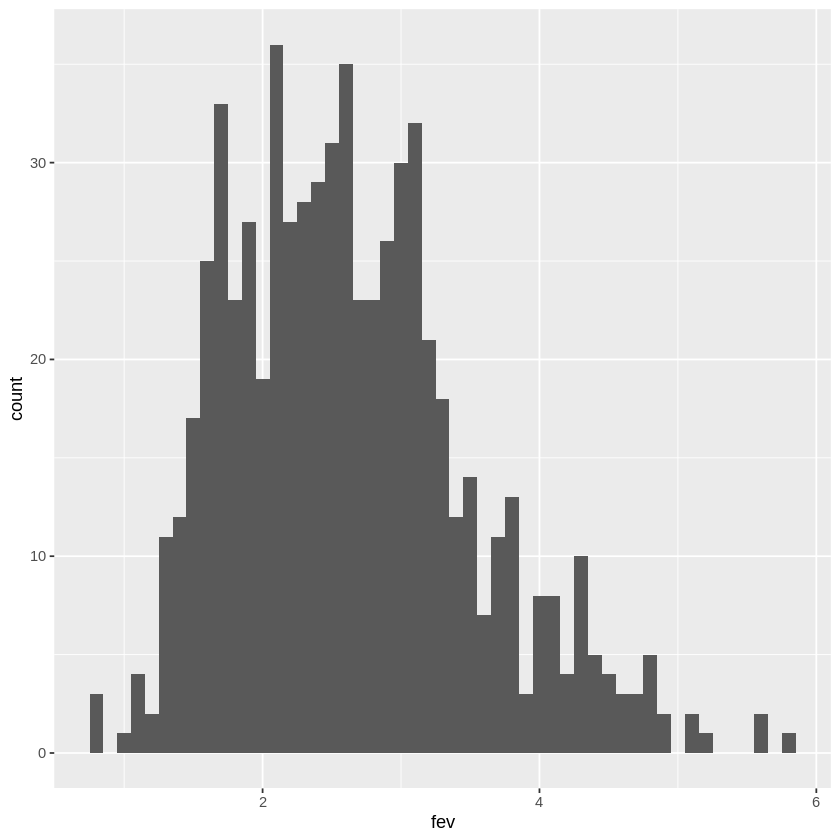

In [45]:
ggplot(fevdata, aes(x = fev)) + geom_histogram(binwidth = 0.1)

**Facet — Inspect Data by Group**
- ggplot allows you to inspect data by group using facet_wrap.

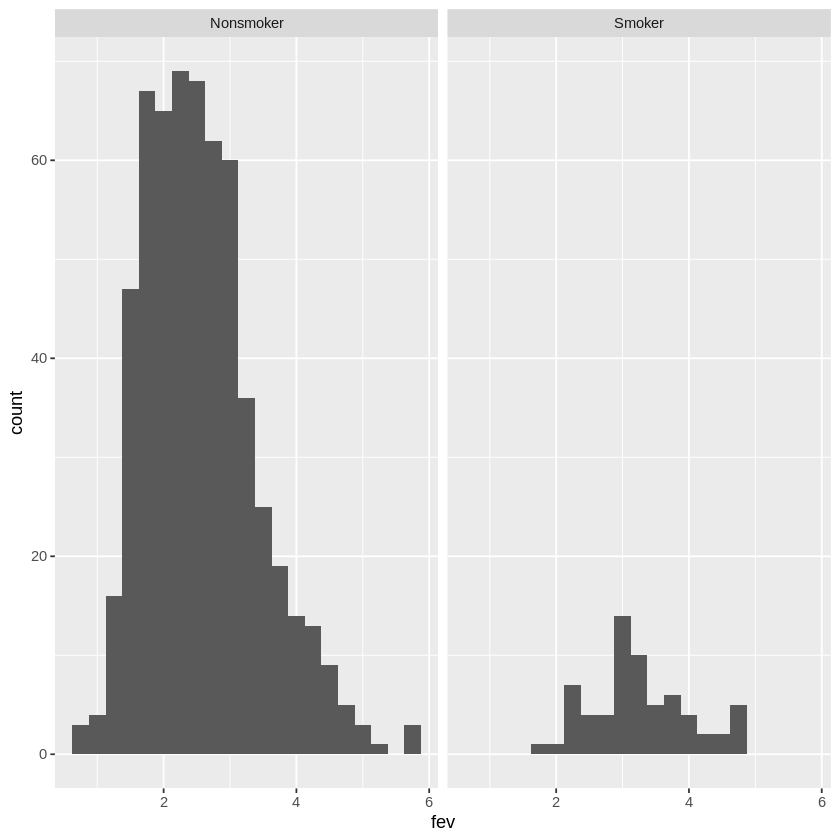

In [46]:
ggplot(fevdata, aes(x = fev)) + geom_histogram(binwidth = 0.25) + facet_wrap(~smoke)

Note :
- The histogram for nonsmokers is taller than the one for smokers since there are far more nonsmokers than smokers in the data
- The two histograms share the same y-axis.

Note : You can free up the y axis so they can be different between the graphs by adding scale="free_y" within facet_wrap().


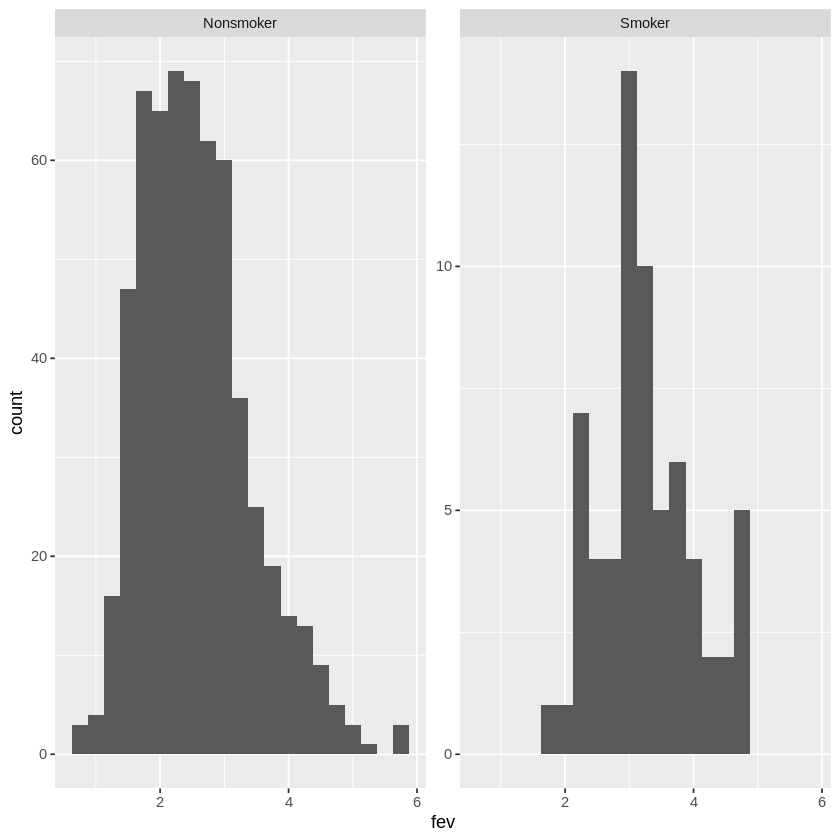

In [47]:
ggplot(fevdata, aes(x = fev)) + geom_histogram(binwidth = 0.25) + facet_wrap(~smoke, scale="free_y")

**Stacking Histograms Vertically**
- Stacking histograms vertically makes it easier to compare the horizontal scale.
- Adding nrow=2 in facet_wrap arranges the histograms in 2 rows.

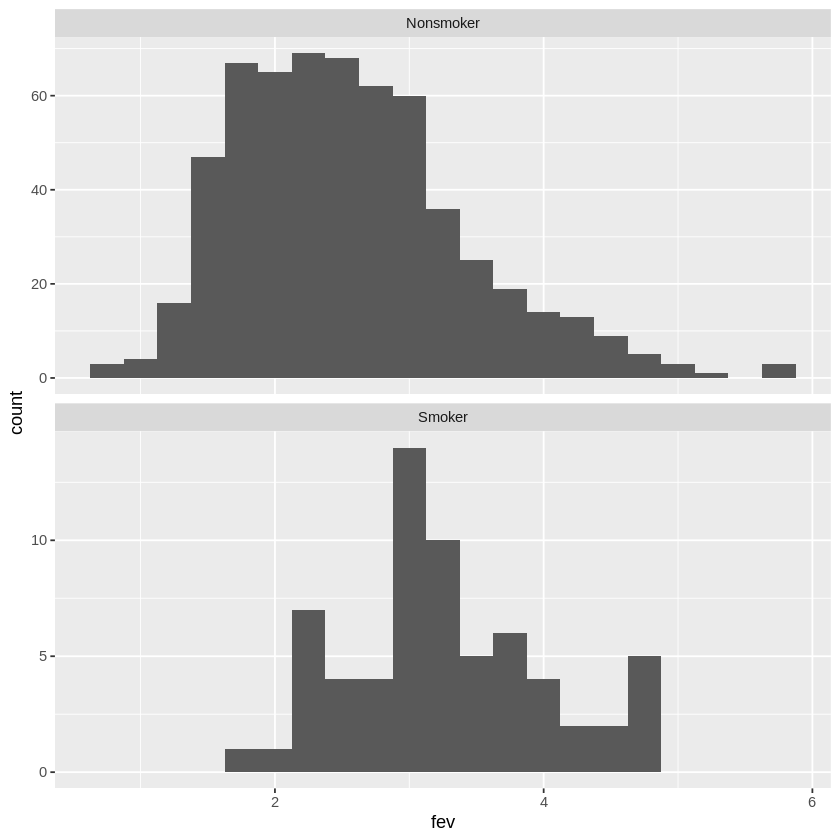

In [48]:
ggplot(fevdata, aes(x = fev)) + geom_histogram(binwidth = 0.25) + facet_wrap(~smoke,scale="free_y",nrow=2)

Do nonsmokers have greater lung capacity than smokers?


**Facet Over 2 Grouping Variables — facet_grid**

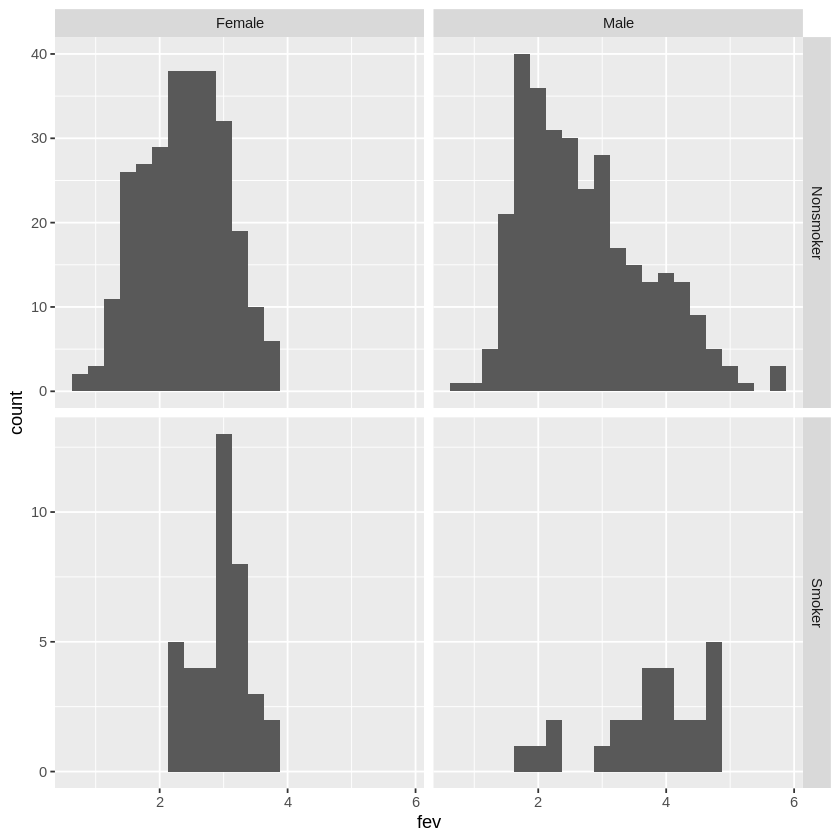

In [49]:
ggplot(fevdata, aes(x = fev)) + geom_histogram(binwidth = 0.25) + facet_grid(smoke ~ sex, scale="free_y")

For females, did smokers or nonsmokers have greater lung capacity? How about males?

One can also facet over 2 grouping variables using facet_wrap() but the 2 layers of grouping labels take too much space.


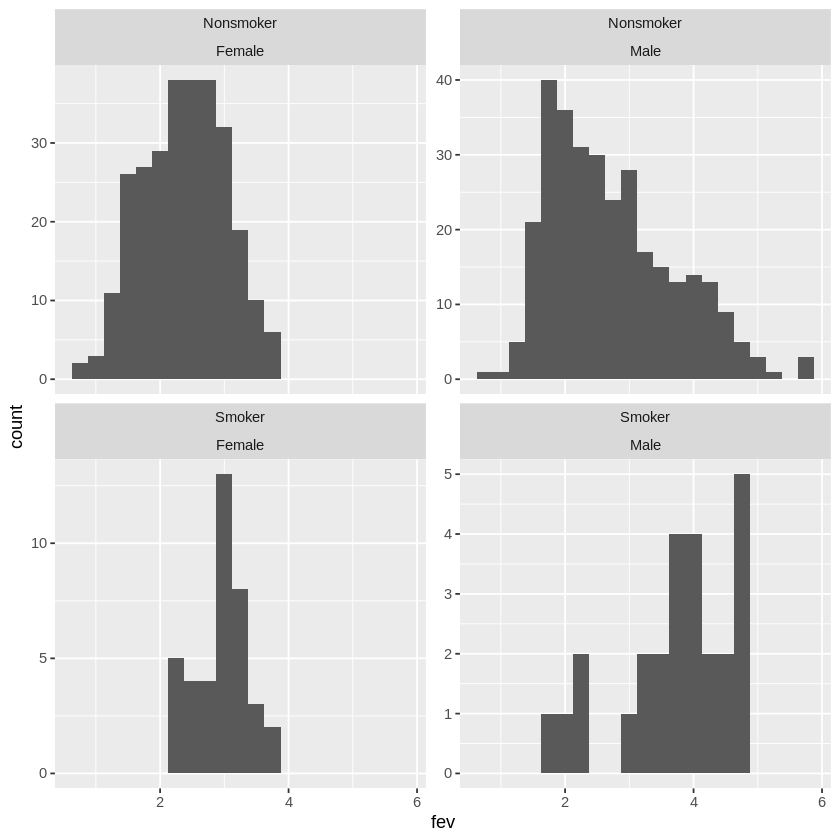

In [50]:
ggplot(fevdata, aes(x = fev)) + geom_histogram(binwidth = 0.25) + facet_wrap(smoke ~ sex, scale="free_y", nrow=2)

**Boxplots by Group (or Side-by-Side Boxplots)**

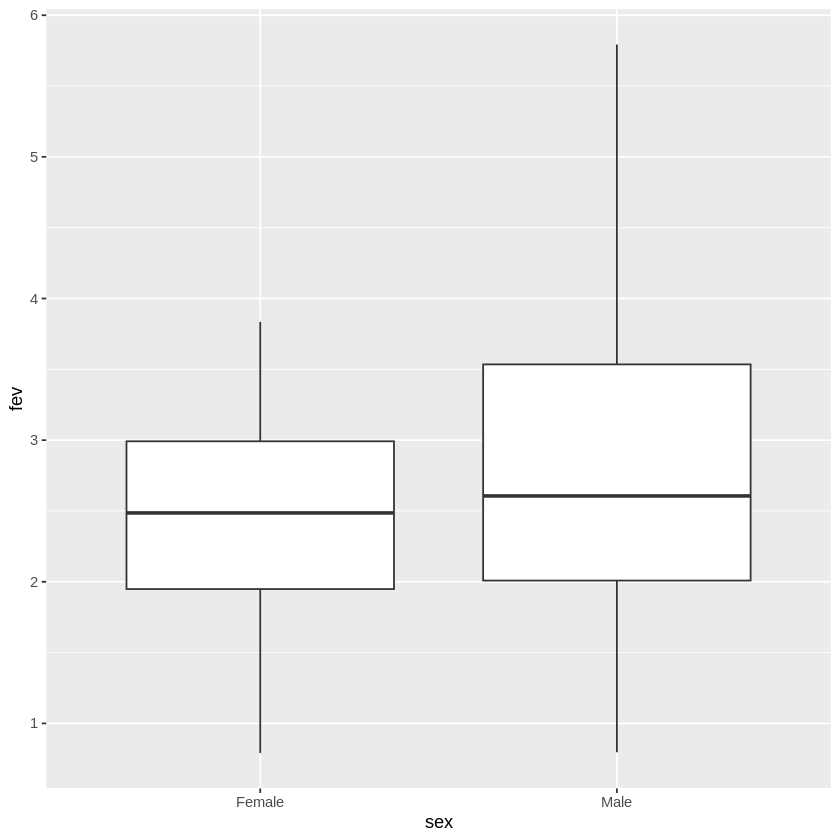

In [51]:
ggplot(fevdata, aes(x = sex, y = fev)) + geom_boxplot()

- Boxplots can be made horizontal by flipping x & y

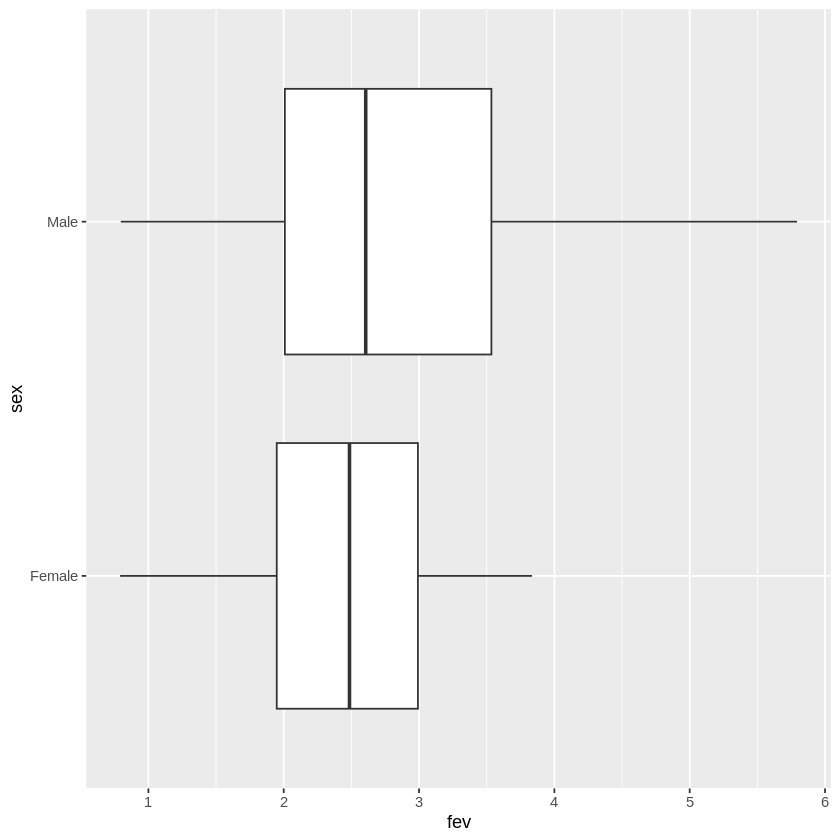

In [52]:
ggplot(fevdata, aes(x= fev, y = sex)) + geom_boxplot()

* Did males or females have greater lung capacity?

**Faceting Boxplots**

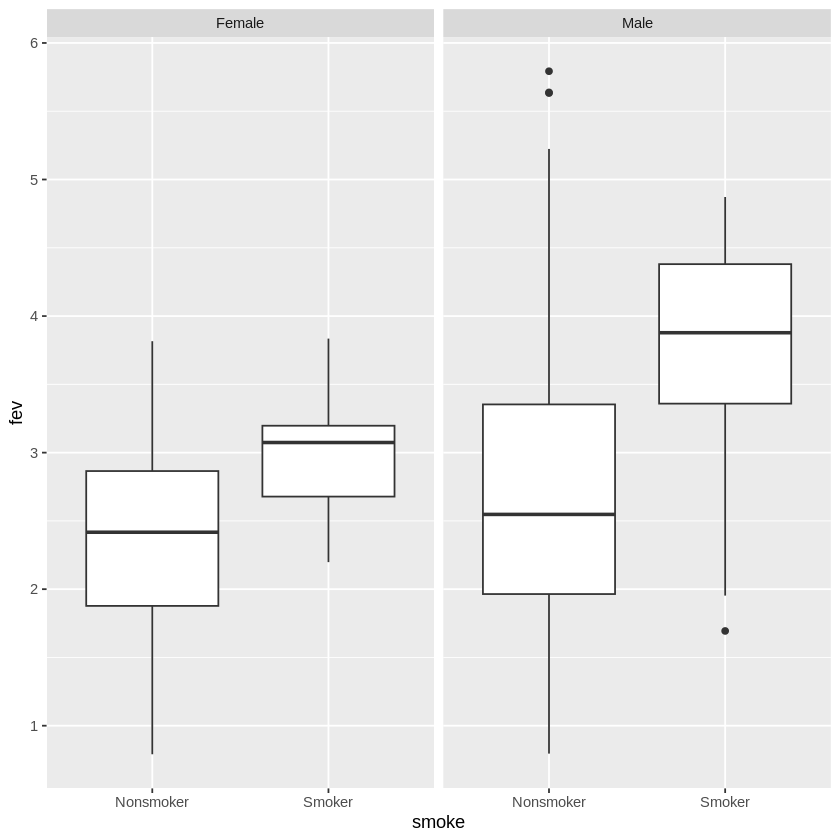

In [53]:
ggplot(fevdata, aes(x = smoke, y = fev)) + geom_boxplot() + facet_wrap(~sex)

For females, do smokers or nonsmokers have greater lung capacities? How about males?

**Please Label Your Plots Properly**


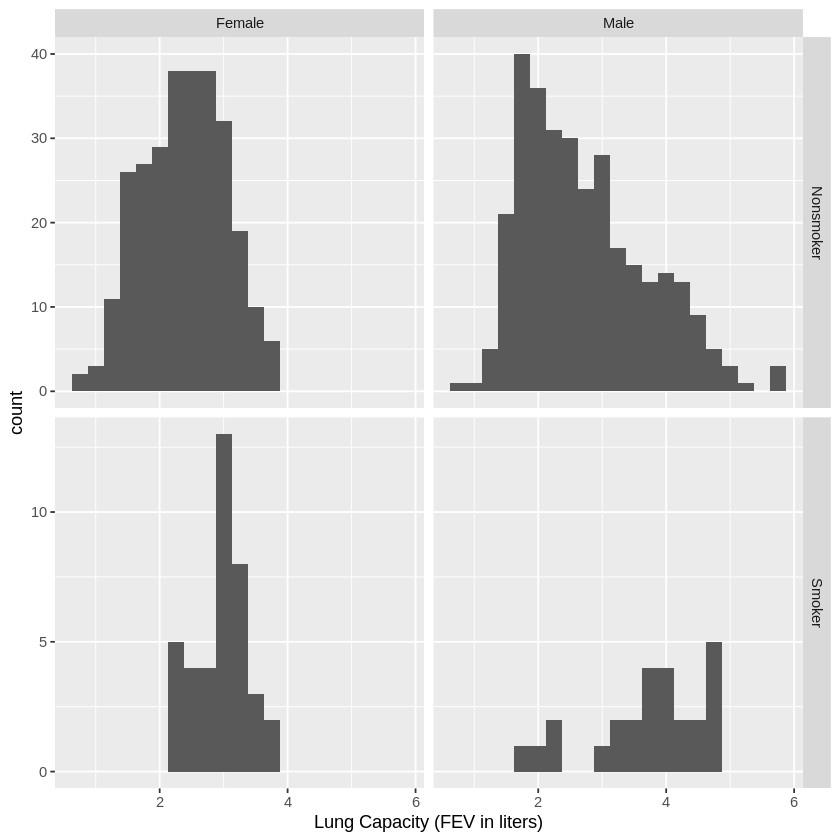

In [54]:
ggplot(fevdata, aes(x = fev)) + geom_histogram(binwidth = 0.25) + facet_grid(smoke~sex, scale="free_y") + xlab("Lung Capacity (FEV in liters)")

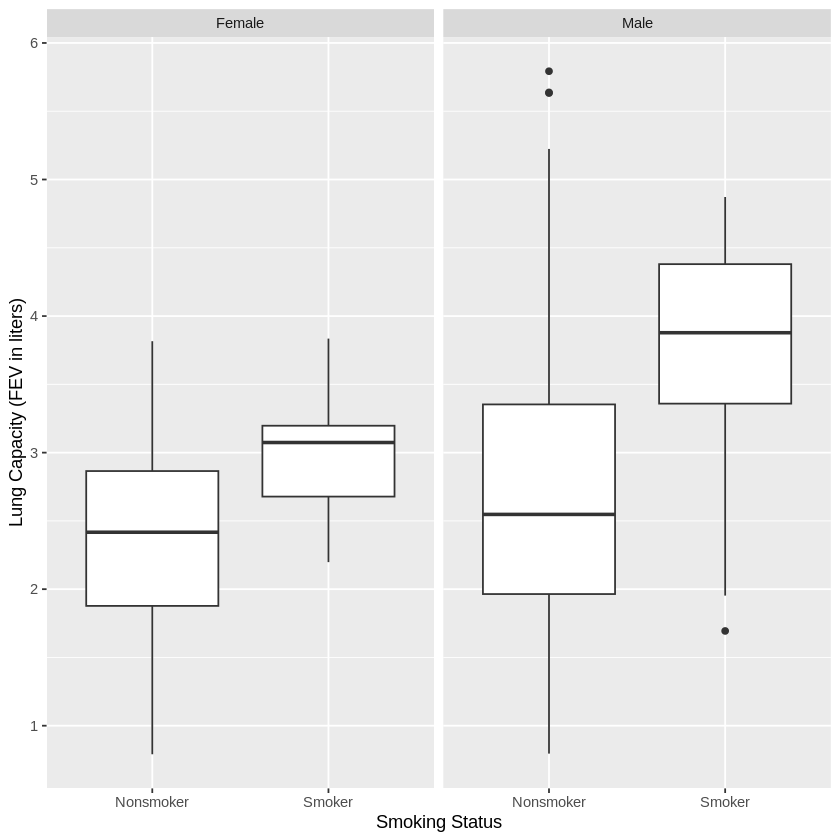

In [55]:
ggplot(fevdata, aes(x=smoke, y=fev)) + geom_boxplot() + facet_wrap(~sex) + xlab("Smoking Status") + ylab("Lung Capacity (FEV in liters)")

**T-test – FEV of Smokers & Nonsmokers**
- Do smokers have a significantly higher mean FEV than nonsmokers?

In [56]:
t.test(fev ~ smoke, data=fevdata)


	Welch Two Sample t-test

data:  fev by smoke
t = -7.1496, df = 83.273, p-value = 3.074e-10
alternative hypothesis: true difference in means between group Nonsmoker and group Smoker is not equal to 0
95 percent confidence interval:
 -0.9084253 -0.5130126
sample estimates:
mean in group Nonsmoker    mean in group Smoker 
               2.566143                3.276862 


**The broom Library Can Tidy Up R Output**
- The tidy() function in the broom library can give a tidier output than the verbose R output for t.test().

In [57]:
library(broom)
tidy(t.test(fev ~ smoke, data=fevdata))

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-0.7107189,2.566143,3.276862,-7.149608,3.073813e-10,83.27311,-0.9084253,-0.5130126,Welch Two Sample t-test,two.sided


In [ ]:
# Need to install the broom library if you haven’t just like the ggplot2 library.
# install.packages("broom")

## **Sample v.s. Population**

* Which of the following is the correct null hypothesis for the t-test on the previous page, assuming that the data were randomly sampled from some population?
1. Smokers in the sample had an identical mean FEV as nonsmokers in the sample.
2. Smokers in the population had an identical mean FEV as nonsmokers in the population

Note :
* Keep in mind that we are interested in the population, not the sample.
* Interpretation of the 95% confidence interval (−0.908, −0.513):
 - With 95% confidnece, the mean FEV of nonsmokers is 0.908 to 0.513 liters lower than that of smokers.

**T-test — FEV of Smokers & Nonsmokers by Sex**
- Do smokers have a significantly higher mean FEV than nonsmokers of the same gender?

In [58]:
tidy(t.test(fev ~ smoke, data=subset(fevdata, sex=="Male")))

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-1.00885,2.734381,3.743231,-5.512755,5.330498e-06,30.25811,-1.382458,-0.635242,Welch Two Sample t-test,two.sided


In [59]:
tidy(t.test(fev ~ smoke, data=subset(fevdata, sex=="Female")))

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-0.5867372,2.379211,2.965949,-7.54361,1.84896e-10,65.24736,-0.7420622,-0.4314123,Welch Two Sample t-test,two.sided


**Coded Scatter Plots**
* In ggplot, it’s easy to make coded scatter plots that the color or shape of points represent a third variable, like smoke

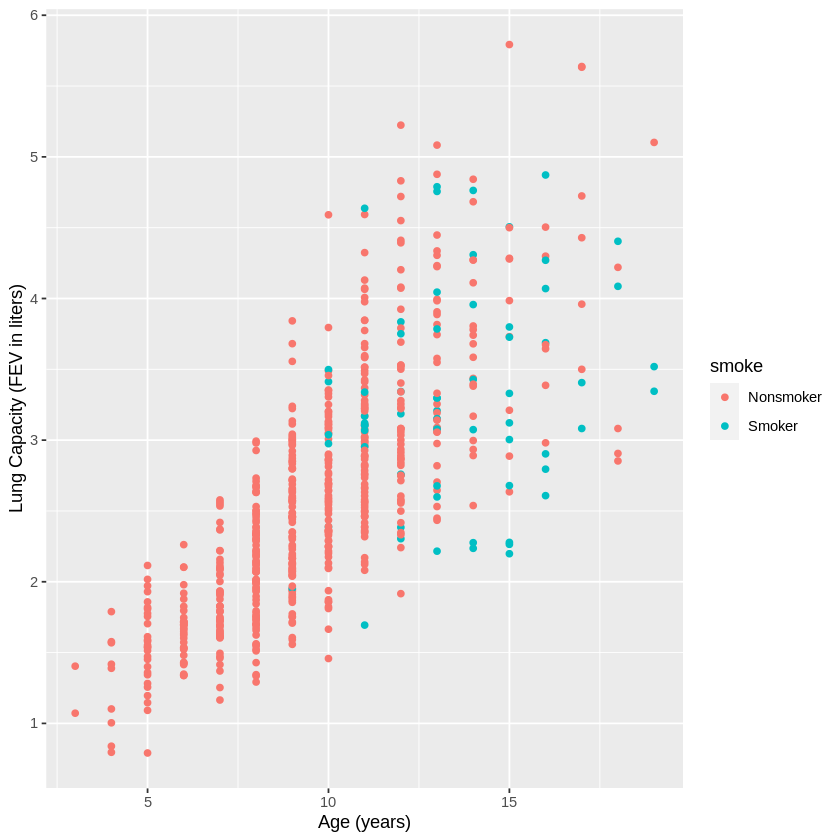

In [60]:
ggplot(fevdata, aes(x = age, y = fev, col=smoke)) + geom_point() + xlab("Age (years)") + ylab("Lung Capacity (FEV in liters)")

* In FEV data, are smokers or nonsmokers older in general?

**Scatter Plots Faceted by Smoke Status**
- One can inspect the relation between age and fev separately for smokers and nonsmokers using facet_wrap.

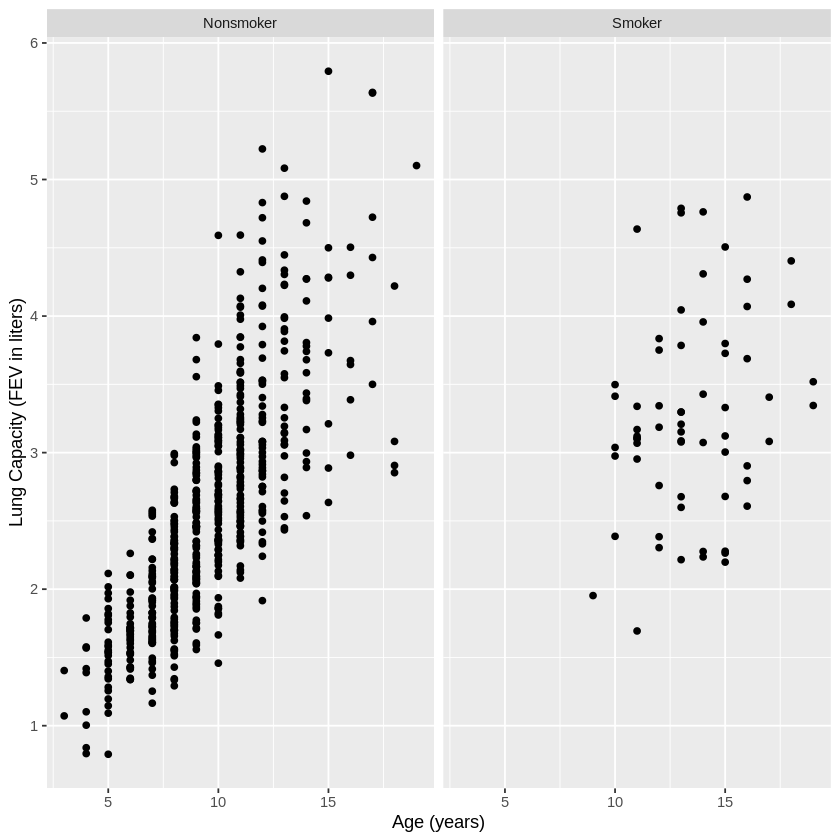

In [61]:
ggplot(fevdata, aes(x = age, y = fev)) + geom_point() + facet_wrap(~smoke) + xlab("Age (years)") + ylab("Lung Capacity (FEV in liters)")

**Observations**
- All subjects are children or teenagers
- Age confounds the relation between smoking status and lung capacities
- Older children had greater lung capacities
- Smokers are older (mostly teens) while nonsmokers include children and teens

**facet_grid Over Both sex & smoke**

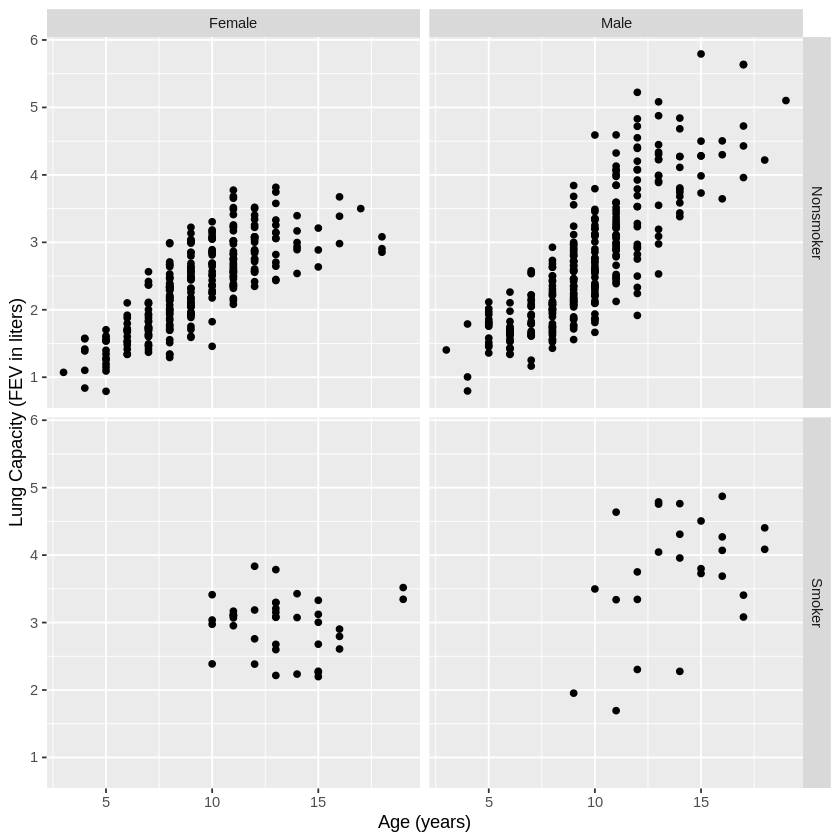

In [62]:
ggplot(fevdata, aes(x = age, y = fev)) + geom_point() + facet_grid(smoke~sex) + xlab("Age (years)") + ylab("Lung Capacity (FEV in liters)")

**Observations**
- Should account for sex since men have greater lung capacities than women.
- For each gender, age still confounds the relation between fev and smoke.
- Does smoke have any effect on fev after accounting for sex and age?

**Adding Least-Square Regression Lines**

`geom_smooth()` using formula = 'y ~ x'


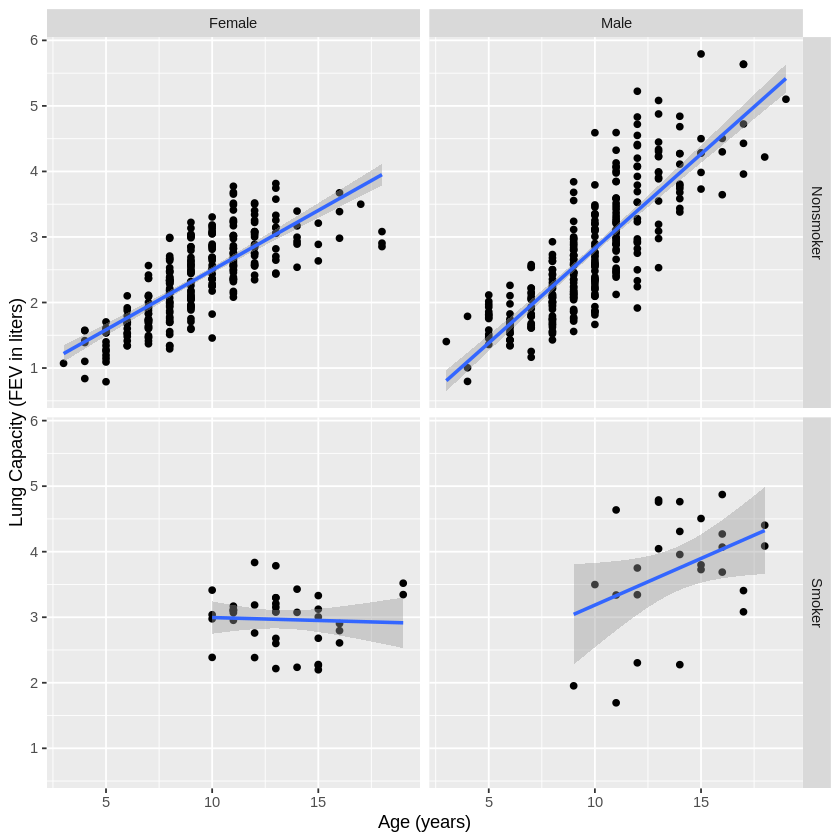

In [63]:
ggplot(fevdata, aes(x = age, y = fev)) + geom_point() + facet_grid(smoke~sex) + geom_smooth(method="lm") + xlab("Age (years)") + ylab("Lung Capacity (FEV in liters)")

**Observations**
- The LS line for female smokers is clearly less steep than that for female nonsmokers, indicating smoking has a negative effect on the growth of lung capacities for females.
- Situation is same for males

`geom_smooth()` using formula = 'y ~ x'


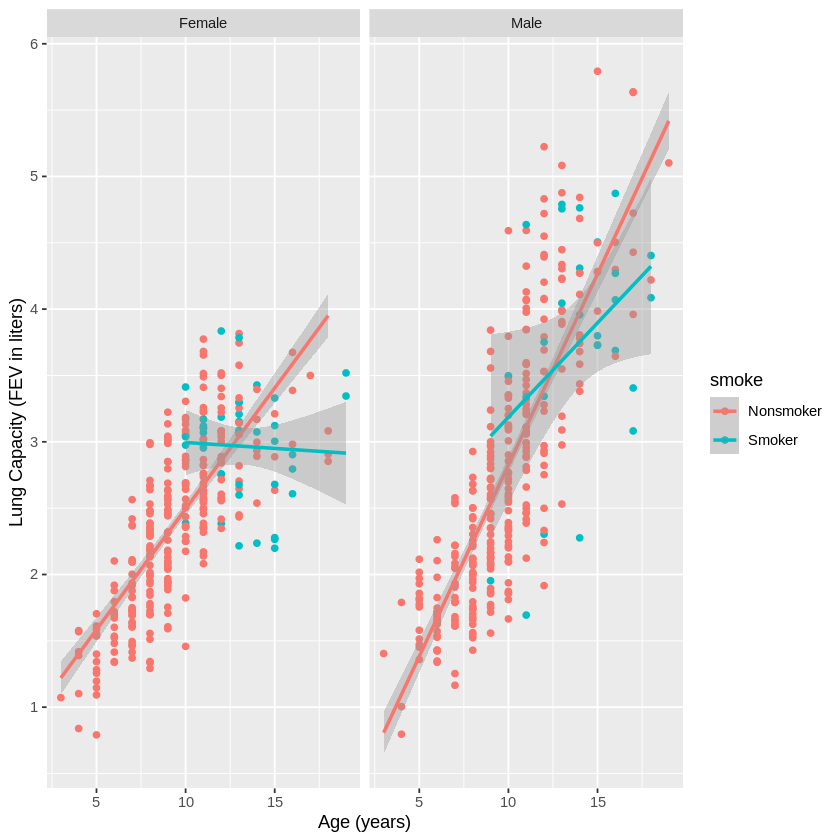

In [64]:
ggplot(fevdata, aes(x = age, y = fev, col=smoke)) + geom_point() + facet_grid(~sex) + geom_smooth(method="lm") + xlab("Age (years)") + ylab("Lung Capacity (FEV in liters)")

**Summary**
- Easier to compare regression lines when placed on the same plot.
- Slope for male smokers is also lower than that for male nonsmokers
- Need a test of whether the slopes of the regression lines are different.